In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

In [0]:
path = "/content/drive/My Drive/Colab Notebooks/Bank/bank-full.csv"
df = pd.read_csv(path,sep=';')

# **Explanatory Data Analysis**

In [0]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


- > The data is related to marketing campaign of a Banking Institute and it contains details of each client. The campaign is based on phone calls. Clients were contacted multiple times inorder to access if the term deposit is subscribed(or not).

In [0]:
df.shape

(45211, 17)

- > The dataset consists of 45211 entries, 16 attributes and an output attribute.

In [0]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

- > 7 attributes are of datatype int, rest are all objects.

In [0]:
#printing the columns of datatype 'object'
for i in df.columns:
  if df[i].dtypes == object:
    print(i,': ',df[i].unique(),'\n')

job :  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

marital :  ['married' 'single' 'divorced'] 

education :  ['tertiary' 'secondary' 'unknown' 'primary'] 

default :  ['no' 'yes'] 

housing :  ['yes' 'no'] 

loan :  ['no' 'yes'] 

contact :  ['unknown' 'cellular' 'telephone'] 

month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

poutcome :  ['unknown' 'failure' 'other' 'success'] 

y :  ['no' 'yes'] 



- > job, marital, education, contact, month, poutcome are categorical variables.
- > default, housing, loan, and y are binary variables(i.e.,'yes' or 'no').
- > Rest of the attributes are numerical variables.

In [0]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [0]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- > There are no missing data or nan values.



In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


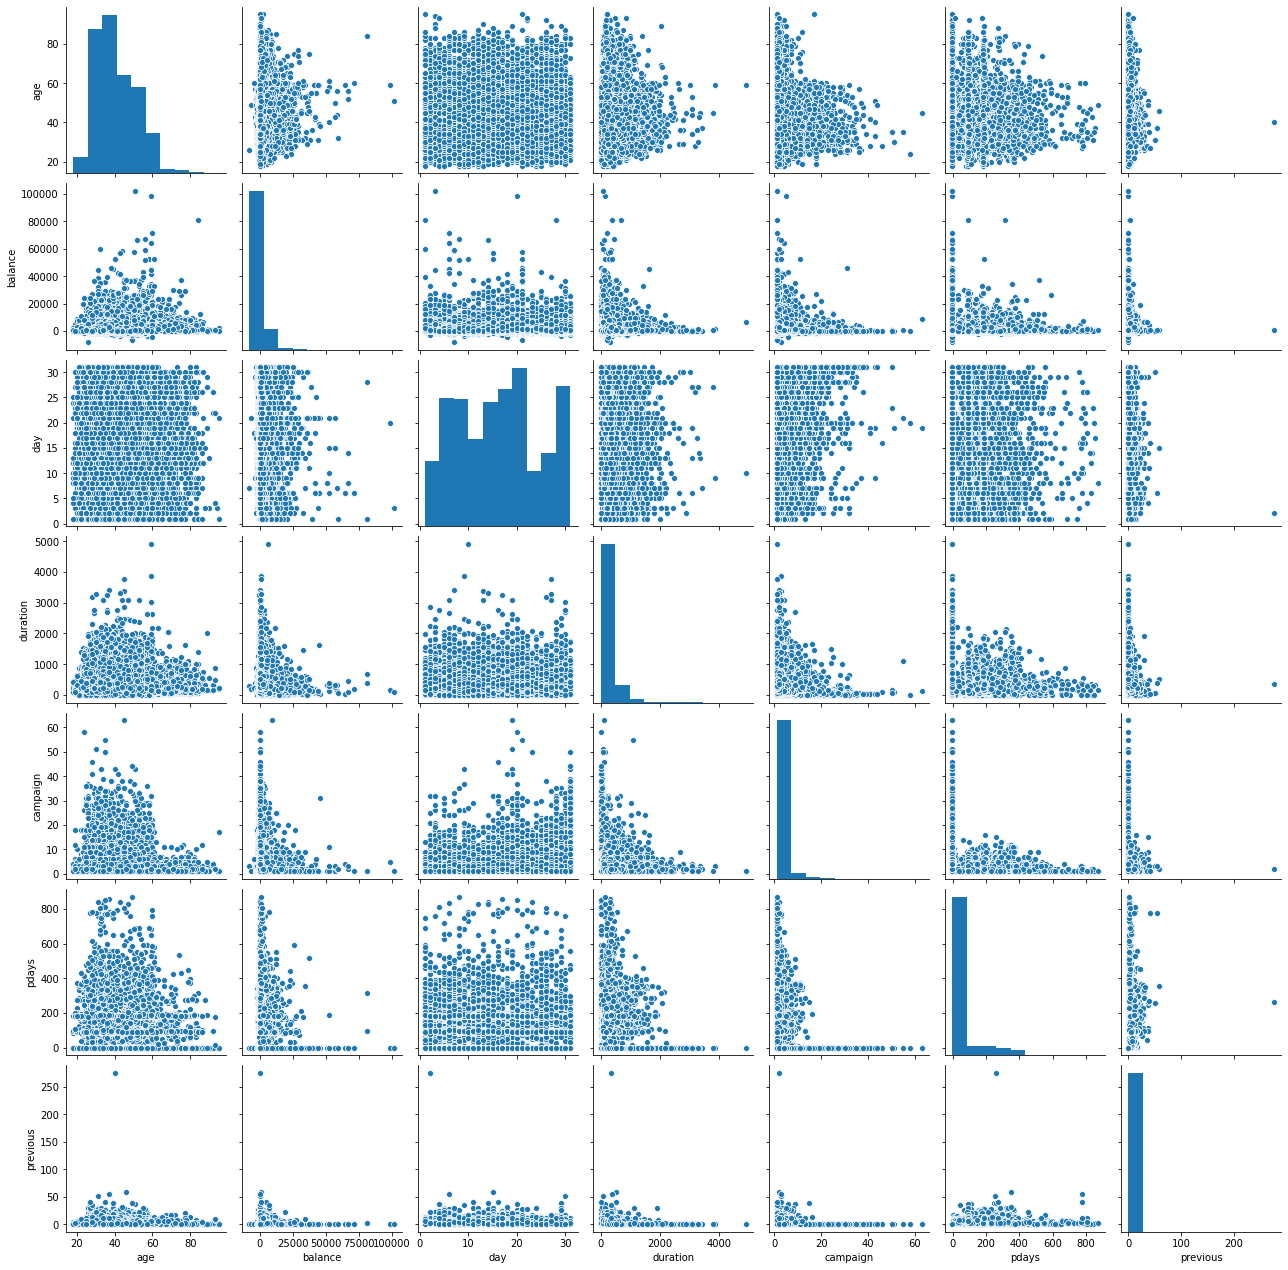

In [0]:
sns.pairplot(df)

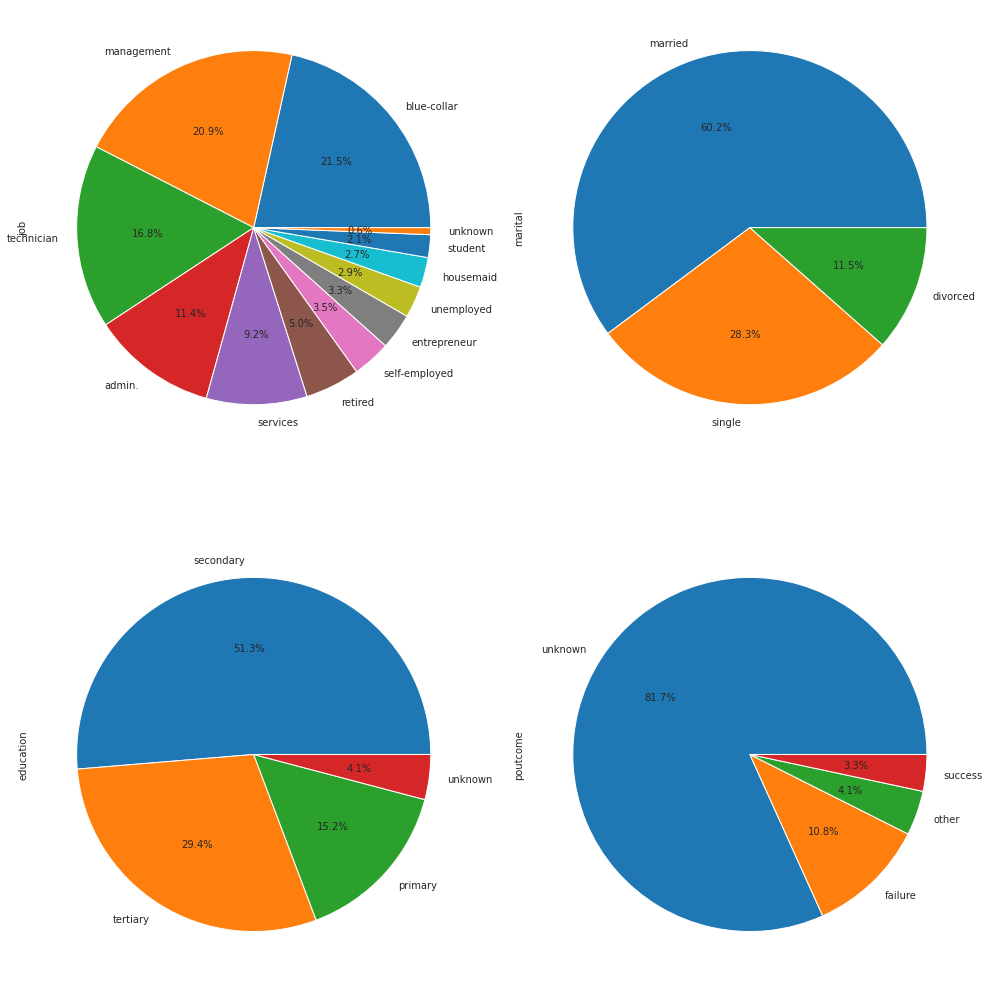

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,15))
plt.subplot(221)
df.iloc[:,1].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(222)
df.iloc[:,2].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(223)
df.iloc[:,3].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(224)
df.iloc[:,15].value_counts().plot.pie(autopct='%1.1f%%')
plt.tight_layout()

- > Majority of the clients are either from blue-collar or management category, then followed by techinician and admin category.
- > Majority of the clients are married and few are divorced(or widowed).
- > Almost 96% of the clients are educated and half of them have secondary education.
- > Majority of outcome of the previous campaign is unknown and in the known success rate is very low. 


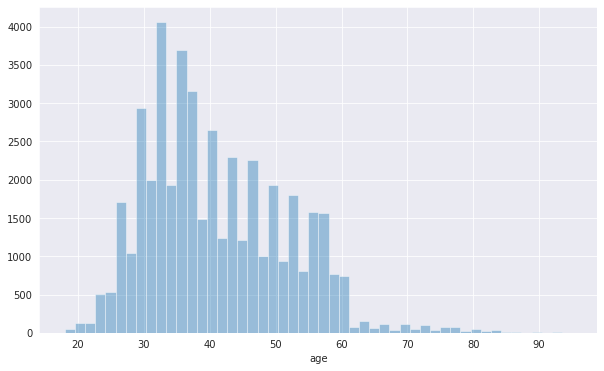

In [0]:
plt.figure(figsize=(10,6))
sns.distplot(df['age'],kde=False)

- > Most of the clients contacted during the campaign are middle-aged gruop.

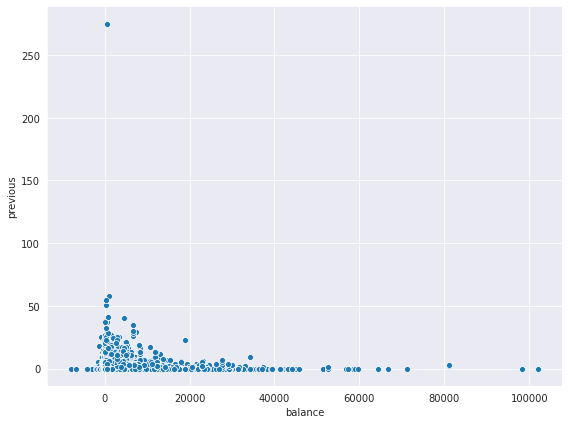

In [0]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='balance',y='previous',data=df)
plt.tight_layout()

- > People with lower Avg. yearly balance were contacted more during the previous campaign.

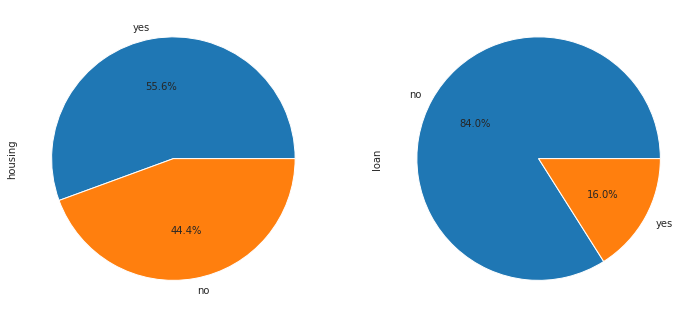

In [0]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
df.iloc[:,6].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
df.iloc[:,7].value_counts().plot.pie(autopct='%1.1f%%')

- > More than half of them have housing loans.
- > Only few of them have personal loans.

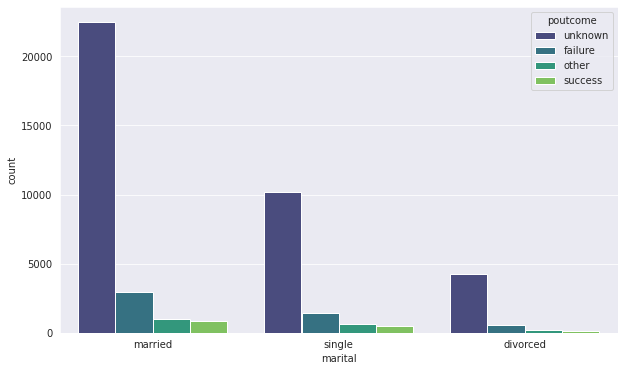

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital',data=df,hue='poutcome',palette='viridis')

- > Married people were contacted many times during the previous campaign and the success rate is also low.

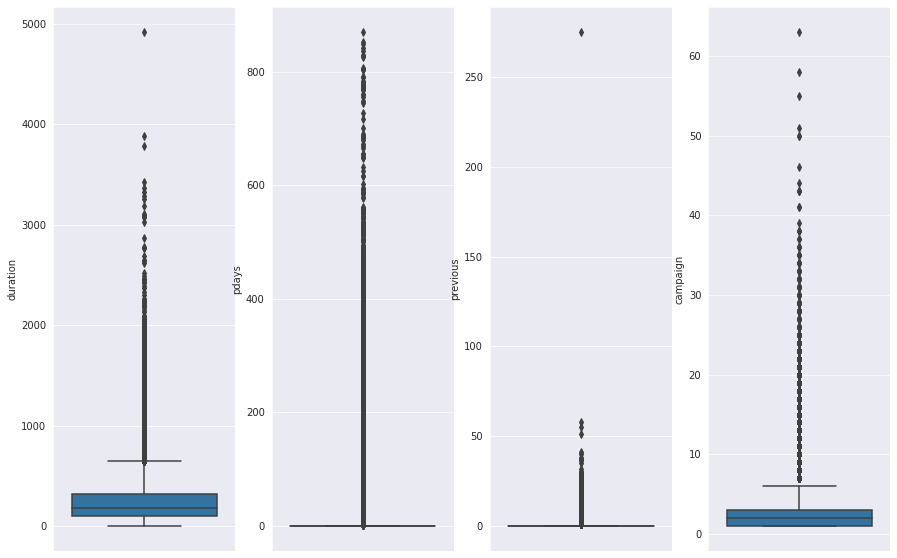

In [0]:
plt.figure(figsize=(15,10))

plt.subplot(1,4,1)
sns.boxplot(y='duration',data=df)

plt.subplot(1,4,2)
sns.boxplot(y='pdays',data=df)

plt.subplot(1,4,3)
sns.boxplot(y='previous',data=df)

plt.subplot(1,4,4)
sns.boxplot(y='campaign',data=df)

- > There are outliers present in the upper quartile of the following attributes.

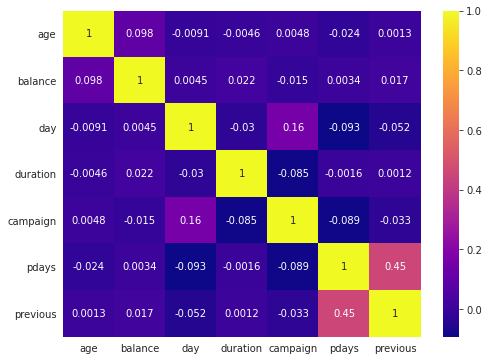

In [0]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='plasma',annot=True)

- > pdays and previous attributes seems to have moderate correlation coefficient, while the rest have weak coefficients.

In [0]:
def converter(x):
  if x == 'yes':
    return 1
  elif x == 'no':
    return 0

In [0]:
#converting binary attributes('yes'or'no') to binary 1's and 0's.
df['y'] = df['y'].apply(converter)
df['default'] = df['default'].apply(converter)
df['housing'] = df['housing'].apply(converter)
df['loan'] = df['loan'].apply(converter)

In [0]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [0]:
mon = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

In [0]:
#mapping each month with an integer.
df['month'] = df['month'].map(mon)

In [0]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [0]:
#label encoding the categorical columns with pandas.
job = pd.get_dummies(df['job'],drop_first=True)
marital = pd.get_dummies(df['marital'],drop_first=True)
edu = pd.get_dummies(df['education'],drop_first=True)
cont = pd.get_dummies(df['contact'],drop_first=True)
pout = pd.get_dummies(df['poutcome'],drop_first=True)

In [0]:
df = pd.concat([df,job,marital,edu,cont,pout],axis=1)

In [0]:
df.drop(['job','marital','education','contact','poutcome'],axis=1,inplace=True)

In [0]:
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single,secondary,tertiary,unknown,telephone,unknown,other,success,unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
scaler.fit(df[['age','balance','day','duration','campaign','pdays','previous']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_data = scaler.transform(df[['age','balance','day','duration','campaign','pdays','previous']])

In [0]:
scaled_data

array([[ 1.60696496,  0.25641925, -1.29847633, ..., -0.56935064,
        -0.41145311, -0.25194037],
       [ 0.28852927, -0.43789469, -1.29847633, ..., -0.56935064,
        -0.41145311, -0.25194037],
       [-0.74738448, -0.44676247, -1.29847633, ..., -0.56935064,
        -0.41145311, -0.25194037],
       ...,
       [ 2.92540065,  1.42959305,  0.14341818, ...,  0.72181052,
         1.43618859,  1.05047333],
       [ 1.51279098, -0.22802402,  0.14341818, ...,  0.39902023,
        -0.41145311, -0.25194037],
       [-0.37068857,  0.52836436,  0.14341818, ..., -0.24656035,
         1.4761376 ,  4.52357654]])

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)

In [0]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
df_pca = pca.transform(scaled_data)

In [0]:
scaled_data.shape

(45211, 7)

In [0]:
df_pca.shape

(45211, 2)

Text(0, 0.5, 'Second Principal Component')

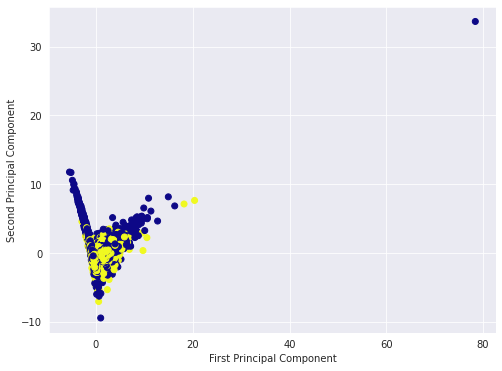

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0],df_pca[:,1],c=df['y'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [0]:
scaled_df = pd.DataFrame(scaled_data,columns=['age','balance','day','duration','campaign','pdays','previous'])

In [0]:
scaled_df.head()

,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194


In [0]:
df_feat = df.drop(['age','balance','day','duration','campaign','pdays','previous'],axis=1)

In [0]:
df_feat = pd.concat([df_feat,scaled_df],axis=1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df_feat.drop('y',axis=1)
y = df_feat['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# **Linear Regression**

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
linear_reg = LinearRegression()

In [0]:
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(linear_reg.intercept_)

0.19499211395680682


In [0]:
coef_df = pd.DataFrame(linear_reg.coef_,X.columns,columns=['coef'])

In [0]:
coef_df

,coef
default,-0.008990
housing,-0.059749
loan,-0.030260
month,-0.002313
blue-collar,-0.022009
entrepreneur,-0.031482
housemaid,-0.042302
management,-0.013816
retired,0.043727
self-employed,-0.021059


In [0]:
pred_lm = linear_reg.predict(X_test)

In [0]:
from sklearn import metrics

In [0]:
print('MAE: ',metrics.mean_absolute_error(y_test,pred_lm))
print('MSE: ',metrics.mean_squared_error(y_test,pred_lm))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,pred_lm)))

MAE:  0.1644126275827881
MSE:  0.07369346624050285
RMSE:  0.2714654052370262


# **Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logistic_reg = LogisticRegression(max_iter=1000)

In [0]:
logistic_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred_log = logistic_reg.predict(X_test)

In [0]:
print(metrics.confusion_matrix(y_test,pred_log))
print()
print(metrics.classification_report(y_test,pred_log))

[[11700   267]
 [ 1055   542]]

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11967
           1       0.67      0.34      0.45      1597

    accuracy                           0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



# **K Nearest Neighbour**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
#Calculating error for each K value(i.e., of range(1,30))
error_rate = []

for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

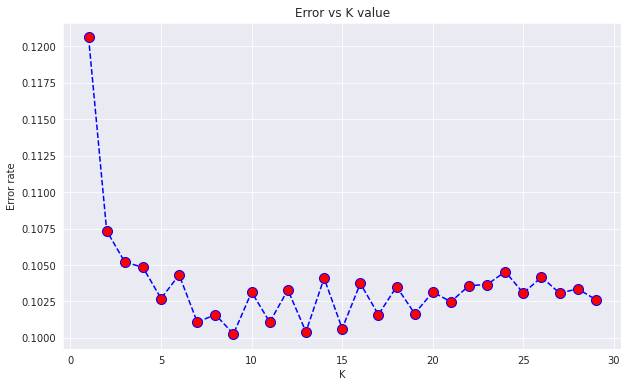

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')

- > From graph, inferring K value as 9.

In [0]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [0]:
pred_knn = knn.predict(X_test)

In [0]:
print(metrics.confusion_matrix(y_test,pred_knn))
print()
print(metrics.classification_report(y_test,pred_knn))

[[11666   301]
 [ 1059   538]]

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11967
           1       0.64      0.34      0.44      1597

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564



# **Decision trees and Random forest**

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier()

In [0]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
pred_dtree = dtree.predict(X_test)

In [0]:
print(metrics.confusion_matrix(y_test,pred_dtree))
print()
print(metrics.classification_report(y_test,pred_dtree))

[[11128   839]
 [  846   751]]

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11967
           1       0.47      0.47      0.47      1597

    accuracy                           0.88     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.88      0.88      0.88     13564



In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(n_estimators=250)

In [0]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred_rfc = rfc.predict(X_test)

In [0]:
print(metrics.confusion_matrix(y_test,pred_rfc))
print()
print(metrics.classification_report(y_test,pred_rfc))

[[11679   288]
 [  980   617]]

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11967
           1       0.68      0.39      0.49      1597

    accuracy                           0.91     13564
   macro avg       0.80      0.68      0.72     13564
weighted avg       0.89      0.91      0.89     13564



# **Support Vector Machine**

In [0]:
from sklearn.svm import SVC

In [0]:
svm_model = SVC()

In [0]:
svm_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
pred_svm = svm_model.predict(X_test)

In [0]:
print(metrics.confusion_matrix(y_test,pred_svm))
print()
print(metrics.classification_report(y_test,pred_svm))

[[11724   243]
 [ 1168   429]]

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11967
           1       0.64      0.27      0.38      1597

    accuracy                           0.90     13564
   macro avg       0.77      0.62      0.66     13564
weighted avg       0.88      0.90      0.88     13564



In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01]}

In [0]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)

In [0]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total= 1.7min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total= 1.7min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 1.6min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 1.6min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 1.6min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  17.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  17.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  17.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 38.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [0]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [0]:
pred_grid = grid.predict(X_test)

In [0]:
print(metrics.confusion_matrix(y_test,pred_grid))
print()
print(metrics.classification_report(y_test,pred_grid))

[[11713   254]
 [ 1044   553]]

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11967
           1       0.69      0.35      0.46      1597

    accuracy                           0.90     13564
   macro avg       0.80      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



- > Random Forests gave better results compared to other models.
